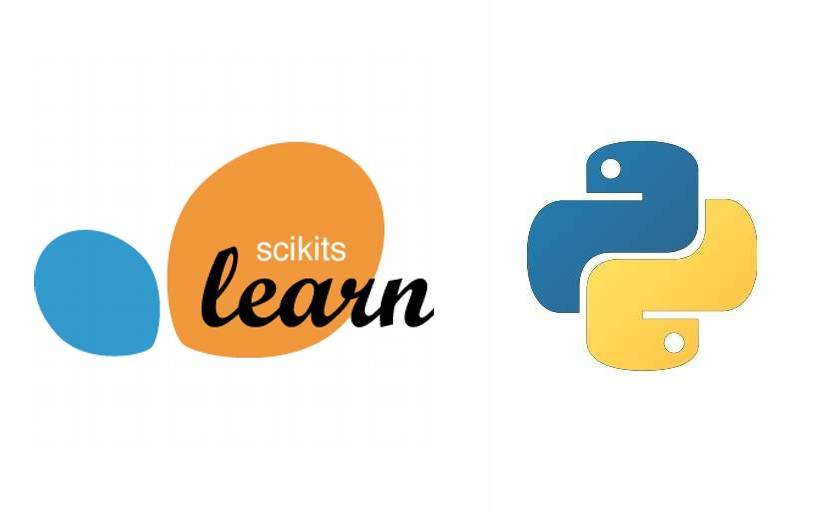

# BID01 - Pengenalan Data Science

Nama: Angelique Keyko Haryono

NRP: 2073016

### Week 12 - Classification Task dengan Support Vector Machine (SVM)

1. Konsep Dasar SVM
2. Dataset: The MNIST Database of Handwritten Digits
3. Classification dengan SVC (Support Vector Classifier)

Kali ini kita akan mengenal Support Vector Machine (SVM). Berikut link referensi yang bisa digunakan:
https://www.svm-tutorial.com/

#### Konsep Dasar SVM

- Decision Boundary (Hyperplane) 

Decision boundary yaitu pemisah atau pembatas antar class. Contohnya pada gambar ini adalah H3.

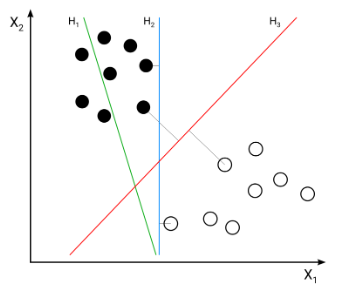

- Maximum Margin

Margin ditentukan berdasarkan jarak terdekat antara decision boundary dengan anggota dari class yang ingin dipisahkan. Contoh pada gambar ini adalah area yang berwarna kuning. Setiap anggota class yang berperan dalam menentukan margin disebut dengan support vector. Dalam menentukan decision boundary, SVM akan memilih berdasarkan maximum margin. 

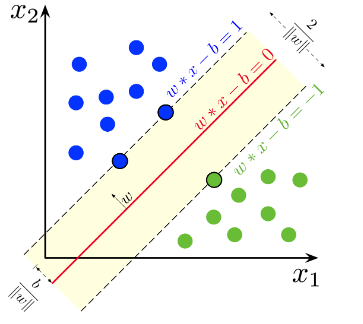

- Linearly Inseperable & Kernel Tricks

Ada beberapa kasus dimana class yang ada tidak dapat dipisahkan dengan memanfaatkan garis linear. Kondisi ini biasanya dinamakan Linearly Inseperable. Untuk mengatasinya, SVM akan memproyeksikan data yang ada ke dimensi yang lebih tinggi. Contohnya pada gambar ini, yang sebelumnya berbentuk 2 dimensi, diproyeksikan menjadi 3 dimensi. 

Untuk mengatasi beban komputasi, SVM menyediakan Kernel Tricks. SVM menyediakan beberapa jenis kernel yang bisa digunakan. Berikut link referensi yang bisa digunakan: https://www.quora.com/What-is-the-kernel-trick

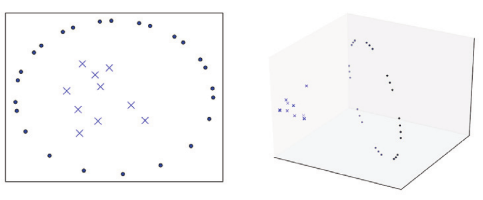

#### Dataset: The MNIST Database of Handwritten Digits

Berikut link referensi untuk dataset yang digunakan: http://yann.lecun.com/exdb/mnist/

Dibawa ini adalah cara mendownload dataset MNIST menggunakan `fetch_openml`. Terdapat 2 variabel yaitu X dan y. X akan menampung sekumpulan nilai features, sedangkan y akan menampung sekumpulan nilai target.

In [1]:
# import modul fetch_openml
from sklearn.datasets import fetch_openml

# memanggil fetch_openml untuk mendoenload dataset 
X, y = fetch_openml('mnist_784', data_home='./data/mnist', return_X_y=True)

# menampilkan dimensi data
X.shape

(70000, 784)

Kita akan mencoba untuk menampilkan 8 data pertama dari dataset ini. 

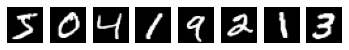

In [2]:
# import modul matplotlib.pyplot dan matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# melakukan looping terhadap 8 baris pertama dari dataset
pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), 
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1

plt.show()

Kita akan menampilkan 8 label yang berkorelasi dengan 8 data pertama yang ditampilkan sebelumnya.

In [3]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

In [4]:
# membagi dataset menjadi training dan testing dataset

# X_train = X[:60000]
# y_train = y[:60000]
# X_test = X[60000:]
# y_test = y[60000:]

X_train = X[:1000]
y_train = y[:1000]
X_test = X[69000:]
y_test = y[69000:]

#### Classification dengan SVC (Support Vector Classifier)

In [5]:
# import modul SVC
from sklearn.svm import SVC

# membuat object model SVC
model = SVC(random_state=0)

# melakukan training menggunakan method fit
model.fit(X_train, y_train)

SVC(random_state=0)

In [6]:
# import modul classification_report
from sklearn.metrics import classification_report

# melakukan prediksi 
y_pred = model.predict(X_test)

# membandingkan hasil prediksi dengan y_test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.99      0.98       119
           2       0.85      0.82      0.84        99
           3       0.97      0.87      0.92       102
           4       0.88      0.95      0.91        92
           5       0.91      0.86      0.88        85
           6       0.93      0.95      0.94       102
           7       0.92      0.94      0.93       115
           8       0.89      0.94      0.91        94
           9       0.92      0.84      0.88        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



#### Hyperparameter Tuning dengan `GridSearchCV`

Parameter yang digunakan untuk mengatur proses training dari suatu model dinamakan hyperparameter. Proses untuk mencari komposisi nilai optimum dari hyperparameter adakah hyperparameter tuning atau hyperparameter optimization. Berikut link referensi yang bisa digunakan untuk pembelajaran lebih lanjut: https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [7]:
# import modul GridSearchCV
from sklearn.model_selection import GridSearchCV

# menspesifikasikan parameter dan pilihan nilai yang akan dikombinasikan
parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

# membentuk object dari GridSearchCV
grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')

# memanggil method fit dari object grid_search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   21.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  2.1min finished


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [8]:
# mengakses score / akurasi terbaik 
print(f'Best Score: {grid_search.best_score_}')

# mengakses nilai parameter terbaik
best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Best Score: 0.907
Best Parameters:
	kernel: rbf
	C: 10
	gamma: scale
